<a href="https://colab.research.google.com/github/emilianolel/Proyecto_BEDU_Equipo_5/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROYECTO


* ## INICIO DEL PROYECTO

* ### IMPORTACIÓN DE LIBRERÍAS

Una vez que generamos nuestras preguntas, obtuvimos una base de datos correspondiente a una muestra poblacional de la India, donde los participantes son en su totalidad mujeres.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

* ### LECTURA DE DATA SET

Ya con nuestros datos, pasamos a hacer uso de pandas para leer los valores y obtener nuestro Data Frame. Imprimimos nuestra tabla y hacemos un análisis rápido de los valores que tenemos y sus columnas.

In [55]:
df = pd.read_csv("https://raw.githubusercontent.com/emilianolel/Proyecto_BEDU_Equipo_5/main/Datasets/diabetes.csv")
df

Pregnancies  Glucose  ...  Age  Outcome
0              6    148.0  ...   50        1
1              8    183.0  ...   32        1
2              0    137.0  ...   33        1
3              3     78.0  ...   26        1
4              2    197.0  ...   53        1
..           ...      ...  ...  ...      ...
763            9     89.0  ...   33        0
764           10    101.0  ...   63        0
765            2    122.0  ...   27        0
766            5    121.0  ...   30        0
767            1     93.0  ...   23        0

[768 rows x 9 columns]

Por medio de la función .info() verificamos que tipo de datos contiene cada una de nuestras columnas y a su vez verificamos si existen valores nulos.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


* ### LIMPIEZA DE DATOS

Debido a que nuestro data set no es muy amplio, queremos conservar todos los datos para poder analizar mejor, por ello en una nueva variable pasaremos el mismo Data Frame y llenaremos los NAN con 0.

In [26]:
df2 = df.fillna(0)
df2

Pregnancies  Glucose  ...  Age  Outcome
0              6    148.0  ...   50        1
1              8    183.0  ...   32        1
2              0    137.0  ...   33        1
3              3     78.0  ...   26        1
4              2    197.0  ...   53        1
..           ...      ...  ...  ...      ...
763            9     89.0  ...   33        0
764           10    101.0  ...   63        0
765            2    122.0  ...   27        0
766            5    121.0  ...   30        0
767            1     93.0  ...   23        0

[768 rows x 9 columns]

Hecho esto, podemos realizar operaciones en las columnas que detectamos existen los NAN y que impactaría de forma negativa tener estos valores como ceros. Por ello, decidimos obtener el promedio de cada columna para después sustituir este valor por nuestros ceros sin que cree una repercusión en nuestro análisis.

In [27]:
df2.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

In [28]:
df2["Glucose"].mean()

120.89453125

In [29]:
df2["BloodPressure"].mean()

69.10546875

In [30]:
df2["SkinThickness"].mean()

20.536458333333332

In [31]:
df2["BMI"].mean()

31.992578124999966

Ya que obtuvimos estos datos, los guardaremos en un diccionario y se los pasaremos como parámetro a la función de fillna() para crear un nuevo Data Frame que contenga los datos ya limpios.

In [32]:
nan_values = {"Glucose": 120.8, "BloodPressure": 69.1, "SkinThickness": 20.5, "BMI": 31.9}
df_clean = df
df_clean = df_clean.fillna(value = nan_values)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


Con ayuda de la función describe() analizamos un poco nuestros datos, viendo valores máximos, mínimos, promedio, etc. de cada una de nuestras columnas.

In [33]:
df_clean.describe()

Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  121.680990  ...   33.240885    0.348958
std       3.369578   30.436033  ...   11.760232    0.476951
min       0.000000   44.000000  ...   21.000000    0.000000
25%       1.000000   99.750000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]

* ### PRIMERAS AGRUPACIONES DE DATOS

Por medio de agrupaciones checamos el promedio de la edad de los casos positivos y negativos de diabetes que encontramos en nuestro data set.

In [60]:
df_clean.groupby("Outcome")["Age"].agg(["mean"])

mean
Outcome           
0        31.190000
1        37.067164

También realizamos una agrupación para contar los casos positivos y negativos por edad y saber cuantas personas pertenecen al mismo rango de años. Esta información más adelante nos servirá para generar algunas inferencias respecto a nuestros datos y preguntas generadas.

In [61]:
edades = df_clean.groupby("Outcome")["Age"].value_counts()
edades

Outcome  Age
0        22     61
         21     58
         24     38
         25     34
         23     31
                ..
1        55      1
         57      1
         61      1
         67      1
         70      1
Name: Age, Length: 96, dtype: int64

Finalmente, almacenamos nuestro Data Frame limpio en un archivo csv para posteriormente utilizarlo en nuestros análisis. 

In [62]:
df_clean.to_csv("clean_data.csv")

* ### CREACION DE NUEVA COLUMNA PARA ANÁLISIS

Ahora, hemos observado que tenemos una columna que nos dice el índice de masa corporal, sin embargo, no es muy cómodo verlo como un número. Este valor nos indica en que rango de peso se encuentra una persona respecto a su estatura, ya sea bajo de peso, normal, elevado sobre lo normal u obesidad. Por ello queremos crear una nueva columna que nos indique por medio de un string a cuál de las categorías anteriores pertenece cada uno de los pacientes de nuestro data set.

In [37]:
df_clean.groupby("Outcome")["BMI"].max()

Outcome
0    57.3
1    67.1
Name: BMI, dtype: float64

Para ello, creamos una función la cual compara el valor “BMI” de cada fila y dependiendo en el valor que tenga, se le asignara la categoría a la que pertenece.

In [38]:
def ComposicionCorporal(row):
  if row["BMI"] <= 18.5:
    return "Bajo"
  if row["BMI"] > 18.5 and row["BMI"] <= 24.9:
    return "Normal"
  if row["BMI"] >= 25 and row["BMI"] <= 29.9:
    return "Elevado"
  if row["BMI"] >= 30:
    return "Obesidad"   

Una vez creada nuestra función, le diremos a nuestro Data Frame que creé una columna nueva llamada “ComposicionCorporal” y por medio de apply pasamos una función lambda que verifique cada una de las filas que tenemos y agregue su respectivo valor en la nueva columna.

In [39]:
df_clean["ComposicionCorporal"] = df_clean.apply(lambda row: ComposicionCorporal(row), axis=1)

Checamos rápidamente nuestro Data Frame y vemos que ya tenemos nuestra nueva columna y explorando un poco los datos vemos que si corresponden a los valores que programamos.

In [40]:
df_clean

Pregnancies  Glucose  BloodPressure  ...  Age  Outcome  ComposicionCorporal
0              6    148.0           72.0  ...   50        1             Obesidad
1              8    183.0           64.0  ...   32        1               Normal
2              0    137.0           40.0  ...   33        1             Obesidad
3              3     78.0           50.0  ...   26        1             Obesidad
4              2    197.0           70.0  ...   53        1             Obesidad
..           ...      ...            ...  ...  ...      ...                  ...
763            9     89.0           62.0  ...   33        0               Normal
764           10    101.0           76.0  ...   63        0             Obesidad
765            2    122.0           70.0  ...   27        0             Obesidad
766            5    121.0           72.0  ...   30        0              Elevado
767            1     93.0           70.0  ...   23        0             Obesidad

[768 rows x 10 columns]

Guardamos este nuevo Data Frame en otro csv para su posterior análisis. 

In [41]:
df_clean.to_csv("Corporal_data.csv")

* ## ANÁLISIS DE COMPOSICIÓN CORPORAL

* ### IMPORTACIÓN DE LIBRERÍAS

Comenzamos importando nuestras librerías, en este caso haremos uso de seaborn y matplotlib que son librerías que nos permiten generar gráficos, además de usar pandas para nuestro análisis de manipulación de datos.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* ### LECTURA Y ESTRUCTURA DE DATOS

Leemos nuestro archivo csv de Corporal_data que previamente creamos, el cual ya contiene nuestros datos limpios y la nueva columna que creamos.

In [43]:
diabetes_df = pd.read_csv('https://github.com/emilianolel/Proyecto_BEDU_Equipo_5/raw/main/Datasets/Corporal_data.csv')
print(diabetes_df.columns) 

Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome', 'ComposicionCorporal'],
      dtype='object')


Vemos la estructura de nuestros datos para ver que estén bien y que sus dimensiones sean las correctas.

In [44]:
diabetes_df.head()

Unnamed: 0  Pregnancies  Glucose  ...  Age  Outcome  ComposicionCorporal
0           0            6    148.0  ...   50        1             Obesidad
1           1            8    183.0  ...   32        1               Normal
2           2            0    137.0  ...   33        1             Obesidad
3           3            3     78.0  ...   26        1             Obesidad
4           4            2    197.0  ...   53        1             Obesidad

[5 rows x 11 columns]

In [45]:
diabetes_df.shape

(768, 11)

* ### ANÁLISIS DE DATOS Y AGRUPACIONES

Creamos una agrupación para la columna “Outcome” la cual nos indica si el paciente tiene diabetes (1) o si salió negativo (0). Y creamos un grafico para observar nuestro resultado.

In [46]:
diabetes_df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


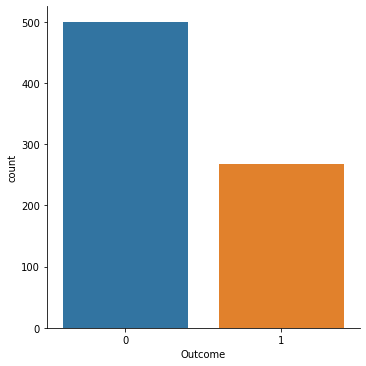

In [47]:
sns.catplot("Outcome", data=diabetes_df, kind = "count")

De igual manera, generamos una agrupación para saber las edades de los pacientes y el numero de veces que se repite cada edad para ver si encontramos alguna tendencia.

In [48]:
diabetes_df.groupby('Age').size()

Age
21    63
22    72
23    38
24    46
25    48
26    33
27    32
28    35
29    29
30    21
31    24
32    16
33    17
34    14
35    10
36    16
37    19
38    16
39    12
40    13
41    22
42    18
43    13
44     8
45    15
46    13
47     6
48     5
49     5
50     8
51     8
52     8
53     5
54     6
55     4
56     3
57     5
58     7
59     3
60     5
61     2
62     4
63     4
64     1
65     3
66     4
67     3
68     1
69     2
70     1
72     1
81     1
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


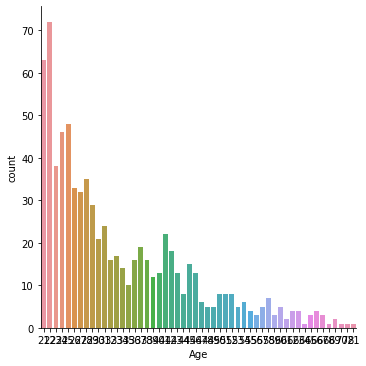

In [49]:
sns.catplot("Age", data=diabetes_df, kind = "count")

Hecho esto, crearemos dos variables, una para los pacientes que dieron positivo a diabetes y la llamaremos “diabetes_confirmado_df” y otra variable para los pacientes que dieron negativo llamado “diabetes_negado_df” y con esto podremos hacer nuevos análisis a nuestros datos.

In [50]:
diabetes_confirmado_df = diabetes_df[diabetes_df['Outcome'] != 0]
diabetes_confirmado_df.groupby('Age').size()

Age
21     5
22    11
23     7
24     8
25    14
26     8
27     8
28    10
29    13
30     6
31    13
32     9
33    10
34     4
35     5
36    10
37     6
38    10
39     3
40     6
41    13
42     7
43    11
44     5
45     8
46     7
47     4
48     1
49     3
50     5
51     5
52     7
53     4
54     4
55     1
56     2
57     1
58     3
59     2
60     2
61     1
62     2
66     2
67     1
70     1
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


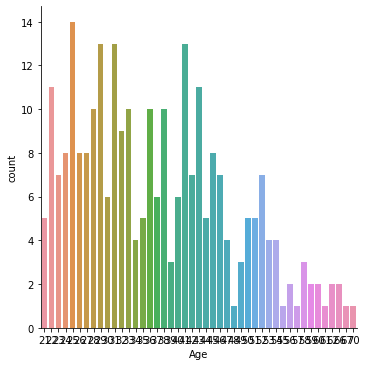

In [51]:
sns.catplot("Age", data=diabetes_confirmado_df, kind = "count")

In [52]:
diabetes_negado_df = diabetes_df[diabetes_df['Outcome'] != 1]
diabetes_negado_df.groupby('Age').size()

Age
21    58
22    61
23    31
24    38
25    34
26    25
27    24
28    25
29    16
30    15
31    11
32     7
33     7
34    10
35     5
36     6
37    13
38     6
39     9
40     7
41     9
42    11
43     2
44     3
45     7
46     6
47     2
48     4
49     2
50     3
51     3
52     1
53     1
54     2
55     3
56     1
57     4
58     4
59     1
60     3
61     1
62     2
63     4
64     1
65     3
66     2
67     2
68     1
69     2
72     1
81     1
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


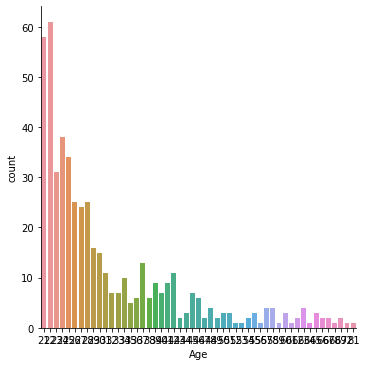

In [ ]:
sns.catplot("Age", data=diabetes_negado_df, kind = "count")

* ### GRÁFICOS DE DATOS

* #### GLUCOSA

Comenzamos analizando los niveles de glucosa de los pacientes con diabetes y sin diabetes y podemos observar que aquellos que han dado positivo mantienen una tendencia en su nivel de glucosa entre 120 y 165, teniendo su media en 140. Mientras que los pacientes que dieron negativo se mantienen en un rango 90 a 125, con una media de 105. Si bien, estos datos tienen congruencia dado que este padecimiento se relaciona con la cantidad de glucosa en la sangre, hay también unos pocos pacientes que tuvieron niveles de glucosa superiores a la media de diabetes y no la padecen, lo que indica que de no contralarla en un futuro podrían llegar a padecerla.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


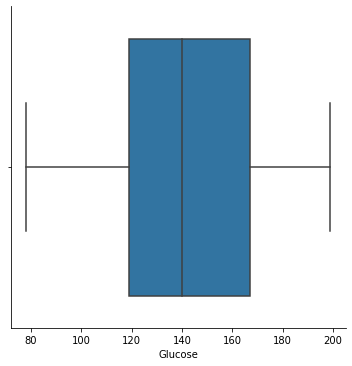

In [53]:
sns.catplot("Glucose", data=diabetes_confirmado_df, kind = "box")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


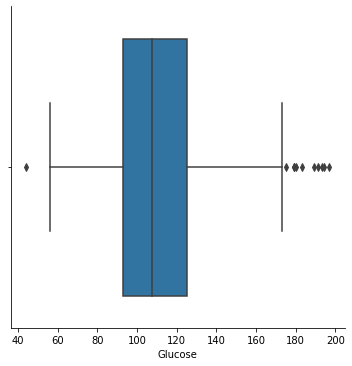

In [54]:
sns.catplot("Glucose", data=diabetes_negado_df, kind = "box")

* #### COMPOSICIÓN CORPORAL

In [ ]:
diabetes_confirmado_df.groupby("ComposicionCorporal").size()

ComposicionCorporal
Elevado      40
Normal        7
Obesidad    221
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


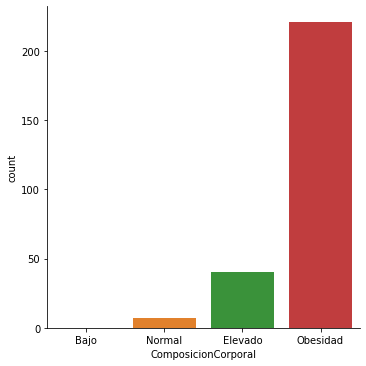

In [ ]:
sns.catplot("ComposicionCorporal", data=diabetes_confirmado_df, kind = "count",order=["Bajo","Normal","Elevado","Obesidad"])

In [ ]:
diabetes_negado_df.groupby("ComposicionCorporal").size()

ComposicionCorporal
Bajo          4
Elevado     139
Normal       95
Obesidad    262
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


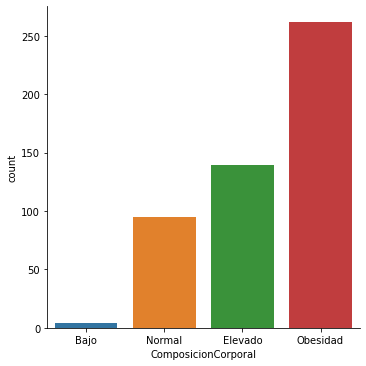

In [ ]:
sns.catplot("ComposicionCorporal", data=diabetes_negado_df, kind = "count",order=["Bajo","Normal","Elevado","Obesidad"])

Graficamos la composición corporal de pacientes positivos y negativos a diabetes, con ello encontramos que aquellos que sufren obesidad era el 82% de los pacientes que tenían diabetes. Mientras que en los pacientes sin diabetes la obesidad equivalía al 52%, además de presentar pacientes bajos de peso, cuyo grupo no estuvo presente en los pacientes positivos a diabetes. 

* #### MULTIPLES PLOTS

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


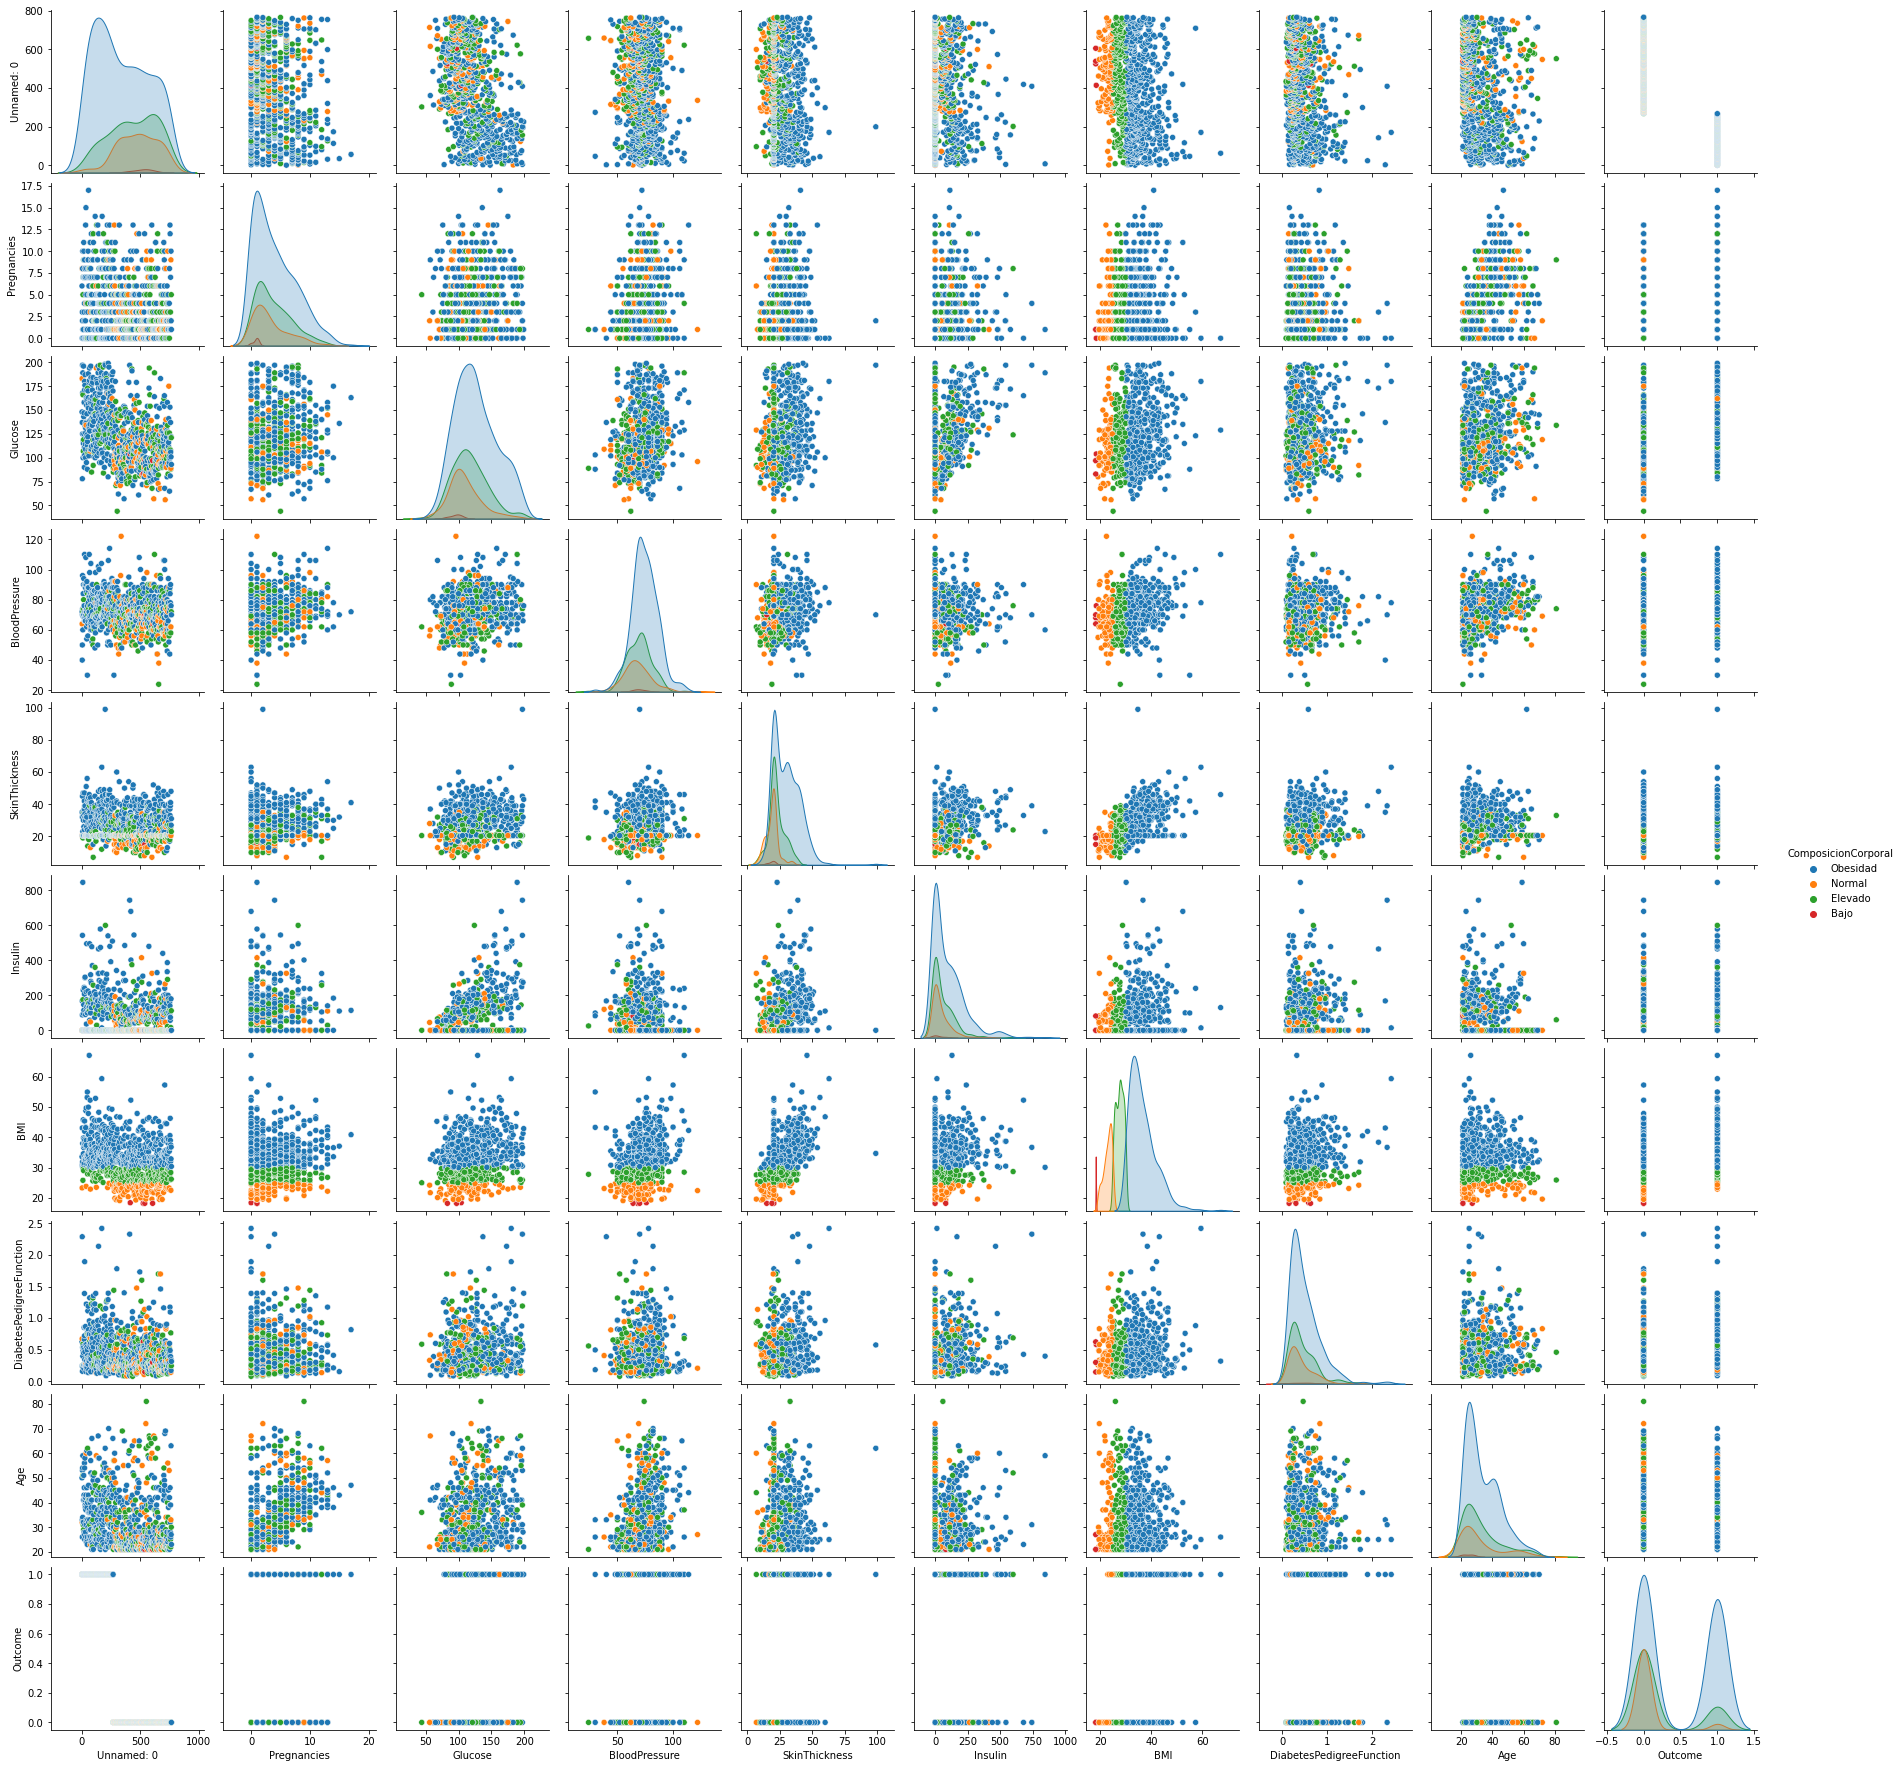

In [ ]:
sns.pairplot(diabetes_df, hue = 'ComposicionCorporal')

Podemos observar que existe una tendencia lineal creciente entre la relación del índice de masa corporal (BMI) y el grosor de la piel de los pacientes (SkinThickness). Cuanto mayor fue BMI mayor grosor presentaron en su piel, de igual manera, al ir aumentando el grosor de piel se comenzó a observar comportamientos corporales elevados y obesidad.

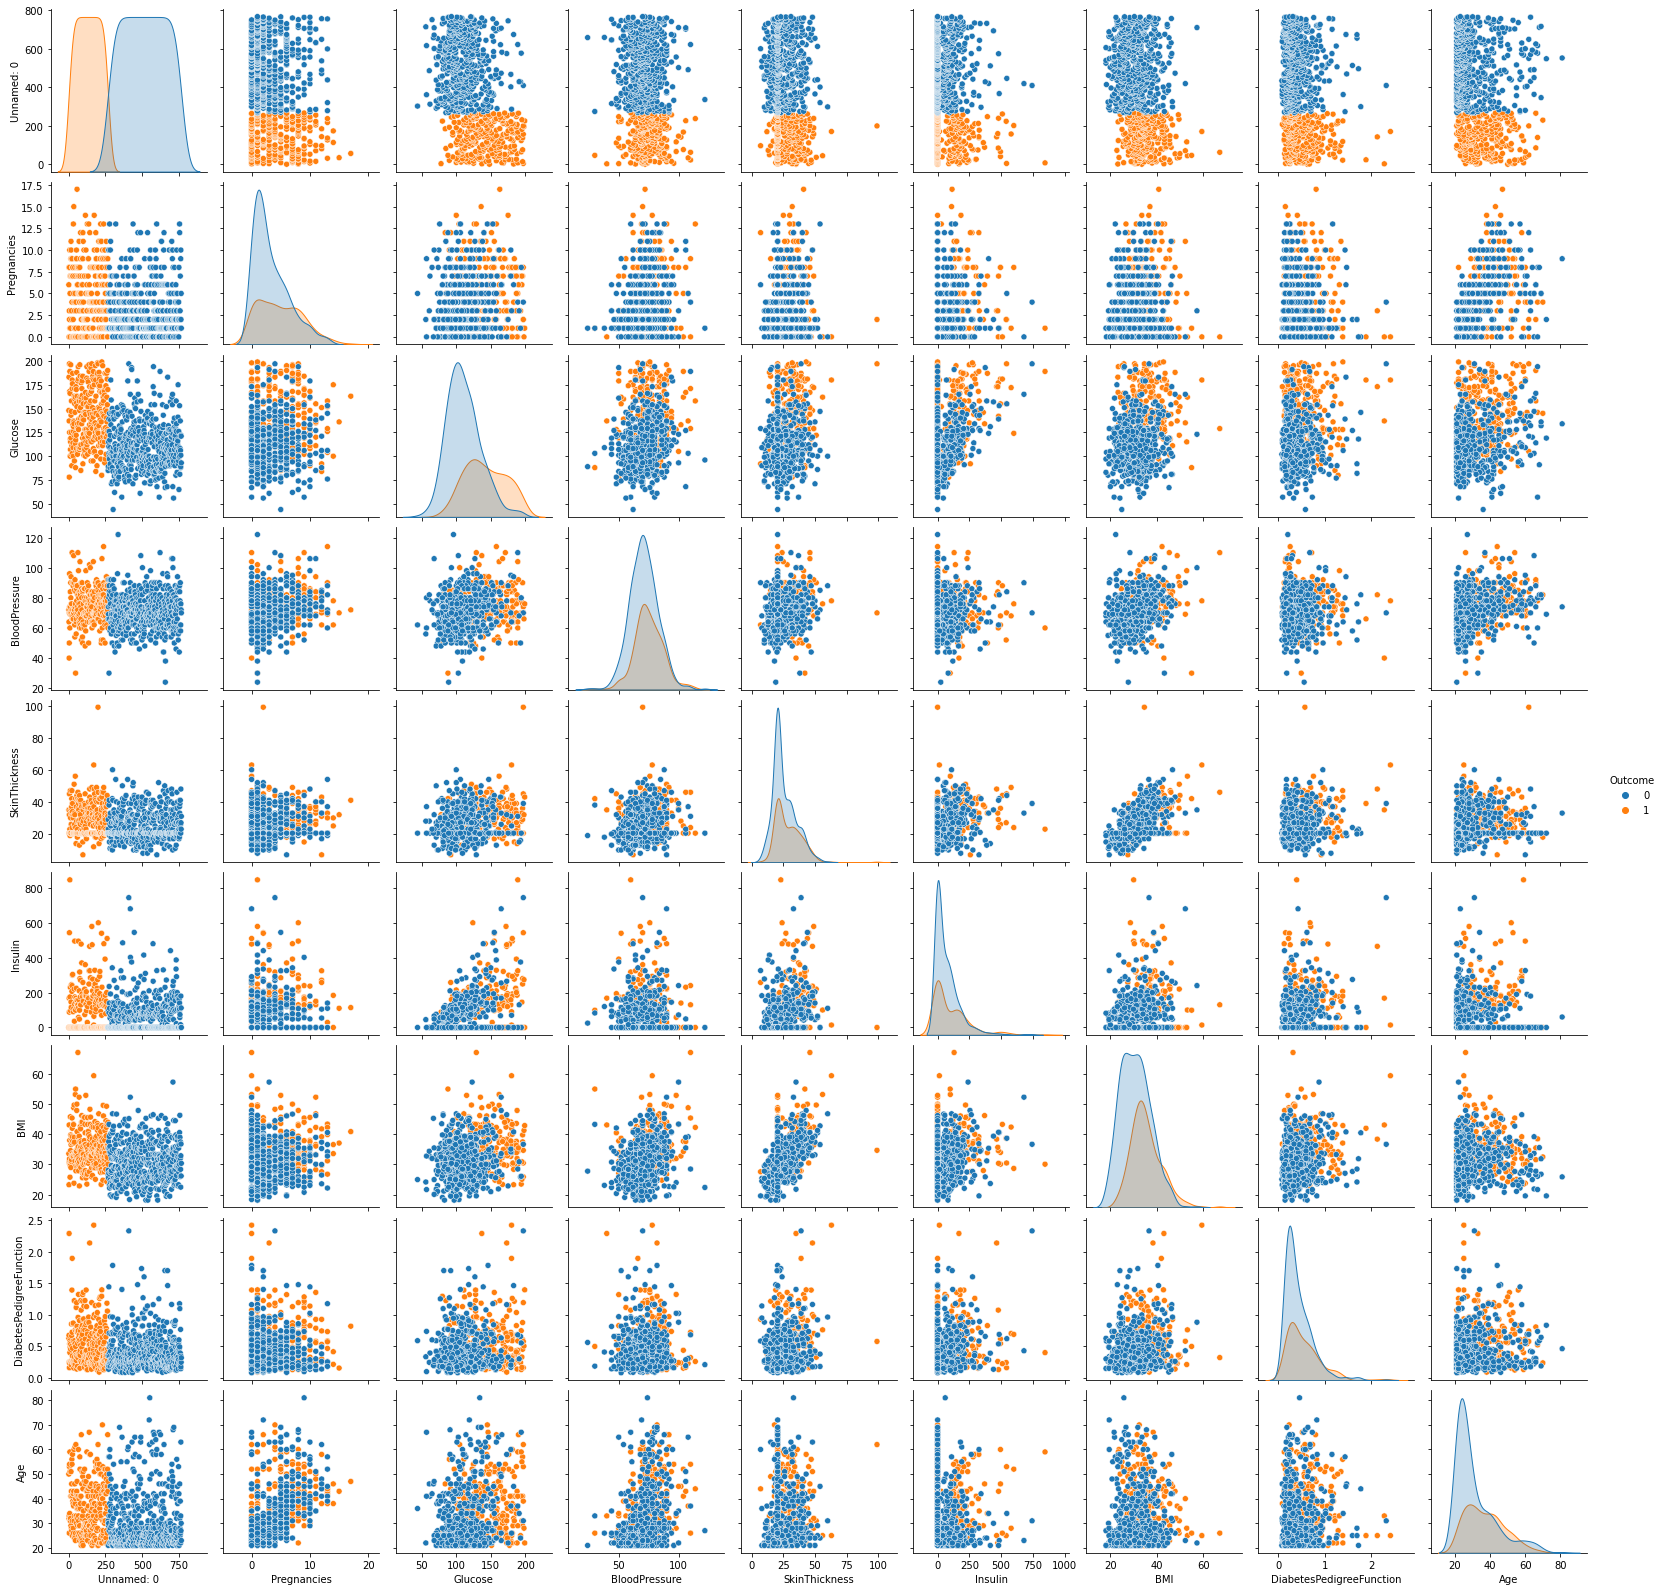

In [ ]:
sns.pairplot(diabetes_df, hue = 'Outcome')

Verificando con las tablas anteriores observamos que algunas personas podían tener un nivel alto de glucosa sin padecer diabetes, sin embargo, en esto influye el historial familiar de cada paciente respecto a esta enfermedad (DiabetesPedigreefunction). Cuando este indicie es mayor, las personas tienen una probabilidad mayor de contraer el padecimiento a menores niveles de azúcar. Mientras que los pacientes con valores bajos en su historial familiar pudieron presentar cantidades altas de glucosa en la sangre sin contraer diabetes.

* ## ANÁLISIS DE TIPO DE DIABETES

* ### IMPORTACIÓN DE LIBRERÍAS

Comenzamos importando nuestras librerías, en este caso haremos uso de seaborn y matplotlib que son librerías que nos permiten generar gráficos, además de usar pandas para nuestro análisis de manipulación de datos.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* ### LECTURA DE DATOS

Leemos nuestro archivo csv y en este nuevo análisis queremos generar una nueva columna que nos permita detectar el tipo de diabetes que presenta cada uno de los pacientes. Esto depende de su nivel de glucosa y se definen en “Normal” debajo de 100, “Pre-Diabetes” entre 100 y 125 y “Diabetes” para valores superiores a 125.

In [64]:
diabetes_df = pd.read_csv('https://github.com/emilianolel/Proyecto_BEDU_Equipo_5/raw/main/Datasets/Corporal_data.csv')

* ### CREACION DE COLUMNA TIPOS DE DIABETES

Para ello creamos una nueva función que nos diga el tipo correspondiente de diabtes en cada fila dependiendo de su valor de glucosa y por medio de apply creamos una función lambda que nos permite comprar fila por fila el valor de glucosa y asignarle su valor correspondiente en la nueva columna.

In [65]:
def tipo_de_diabetes(row):
  if row["Glucose"] < 100:
    return "Normal"
  if row["Glucose"] >= 100 and row["Glucose"] < 125:
    return "Pre Diabetes"
  if row["Glucose"] >= 125:
    return "Diabetes"

In [66]:
diabetes_df["TipoDiabetes"] = diabetes_df.apply(lambda row: tipo_de_diabetes(row), axis=1)

In [67]:
diabetes_df.head()

Unnamed: 0  Pregnancies  Glucose  ...  Outcome  ComposicionCorporal  TipoDiabetes
0           0            6    148.0  ...        1             Obesidad      Diabetes
1           1            8    183.0  ...        1               Normal      Diabetes
2           2            0    137.0  ...        1             Obesidad      Diabetes
3           3            3     78.0  ...        1             Obesidad        Normal
4           4            2    197.0  ...        1             Obesidad      Diabetes

[5 rows x 12 columns]

In [68]:
diabetes_df.to_csv("Tipo_Diabetes.csv")

* ### ANÁLISIS DE DATOS Y GRÁFICAS

Creamos dos nuevos Data Frames, uno para los pacientes positivos a diabetes y otro para los casos negativos.

In [69]:
diabetes_confirmado_df = diabetes_df[diabetes_df['Outcome'] != 0]
diabetes_negado_df = diabetes_df[diabetes_df['Outcome'] != 1]
print(diabetes_df.columns) 

Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome', 'ComposicionCorporal', 'TipoDiabetes'],
      dtype='object')


In [70]:
diabetes_df.shape

(768, 12)

Graficamos el tipo de diabetes de los pacientes con diabetes y observamos que una gran parte de esta población tiene un nivel de glucosa alta, correspondiente al tipo diabetes, mientras que menos de 25 pacientes han logrado mantener su nivel de glucosa a un nivel normal.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


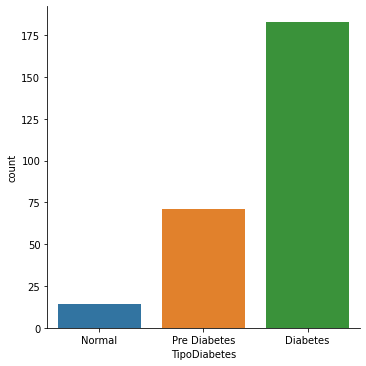

In [71]:
sns.catplot("TipoDiabetes", data=diabetes_confirmado_df, kind = "count",order=["Normal","Pre Diabetes","Diabetes"])

Ahora graficamos, el tipo de diabetes de los pacientes negativo a diabetes. Podemos observar que, aunque gran parte de la población mantiene un nivel de glucosa normal, mas de la mitad corresponden a Prediabetes y diabetes a pesar de no tener la enfermedad. Esto indica que dichos pacientes tienen un alto riesgo de padecer esta enfermedad si no comienzan a controlar sus niveles de glucosa.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


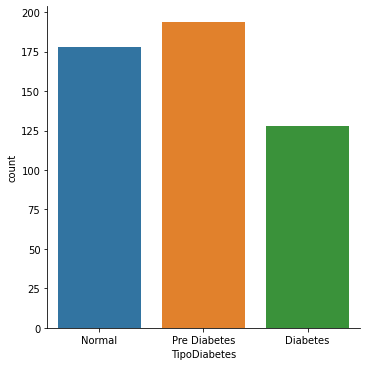

In [72]:
sns.catplot("TipoDiabetes", data=diabetes_negado_df, kind = "count",order=["Normal","Pre Diabetes","Diabetes"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


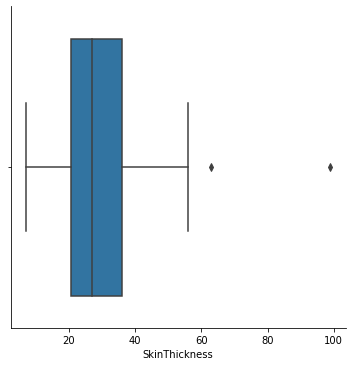

In [73]:
sns.catplot("SkinThickness", data=diabetes_confirmado_df, kind = "box")

* ### TABLAS DE ANÁLISIS

Por medio de la función describe() obtenemos un resumen analítico de las variables más importantes. En esta tabla podemos observar los datos máximos, mínimos y sus promedios de aquellos pacientes que dieron positivo a diabetes.

In [74]:
diabetes_confirmado_df.describe().loc[:,["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]]

Glucose  BloodPressure  ...         Age  Outcome
count  268.000000     268.000000  ...  268.000000    268.0
mean   142.158955      74.950000  ...   37.067164      1.0
std     29.546454      12.016731  ...   10.968254      0.0
min     78.000000      30.000000  ...   21.000000      1.0
25%    119.000000      68.000000  ...   28.000000      1.0
50%    140.000000      74.000000  ...   36.000000      1.0
75%    167.000000      82.000000  ...   44.000000      1.0
max    199.000000     114.000000  ...   70.000000      1.0

[8 rows x 8 columns]

De igual forma, utilizamos describe() pero ahora utilizando nuestro data frame de pacientes que dieron negativo a diabetes, solo para comparar los valores con la tabla anterior y observar si hay alguna relación entre los datos que pudiera ser útil. Entre estos datos podemos observar el promedio de glucosa que presenta las personas que tienen diabetes y la gran diferencia contra aquellos que no presentaron la enfermedad.

In [75]:
diabetes_negado_df.describe().loc[:,["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]]

Glucose  BloodPressure  ...         Age  Outcome
count  500.000000     500.000000  ...  500.000000    500.0
mean   110.704800      70.809800  ...   31.190000      0.0
std     24.714788      11.932299  ...   11.667655      0.0
min     44.000000      24.000000  ...   21.000000      0.0
25%     93.000000      63.500000  ...   23.000000      0.0
50%    107.500000      70.000000  ...   27.000000      0.0
75%    125.000000      78.000000  ...   37.000000      0.0
max    197.000000     122.000000  ...   81.000000      0.0

[8 rows x 8 columns]

In [77]:
diabetes_df.describe().loc[:,["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]]

Glucose  BloodPressure  ...         Age     Outcome
count  768.000000     768.000000  ...  768.000000  768.000000
mean   121.680990      72.254557  ...   33.240885    0.348958
std     30.436033      12.115997  ...   11.760232    0.476951
min     44.000000      24.000000  ...   21.000000    0.000000
25%     99.750000      64.000000  ...   24.000000    0.000000
50%    117.000000      72.000000  ...   29.000000    0.000000
75%    140.250000      80.000000  ...   41.000000    1.000000
max    199.000000     122.000000  ...   81.000000    1.000000

[8 rows x 8 columns]

Graficamos el número de embarazos de aquellos pacientes positivos a diabetes. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


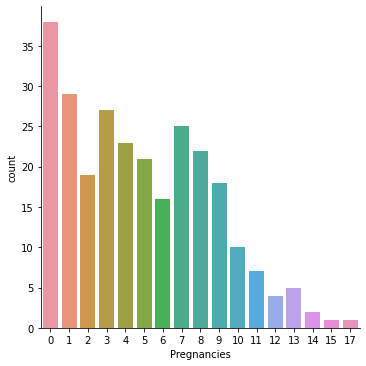

In [78]:
sns.catplot("Pregnancies", data=diabetes_confirmado_df, kind = "count")

Graficamos el número de embarazos para los pacientes que no presentaron diabetes.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


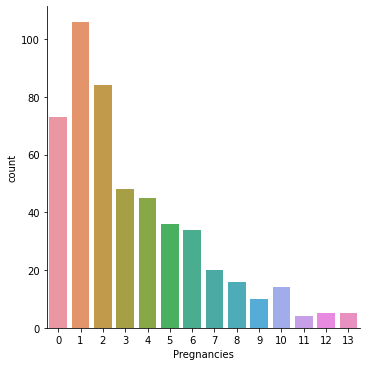

In [79]:
sns.catplot("Pregnancies", data=diabetes_negado_df, kind = "count")

Por medio de la función corr() que pandas nos ofrece, creamos un correlograma de nuestras variables. Esto nos indica que tanta relación existe entre dos variables, mientras mas cercano sea el valor a 1.0 implica que la relación de esas variables es más significativa. Como ejemplo, podemos observar la variable de embarazos contra la edad tiene un 54% de relación. Mientras que la glucosa y la edad solo un 26%

In [80]:
diabetes_df.loc[:,["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]].corr()

Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.127970  ...  0.544341  0.221898
Glucose                      0.127970  1.000000  ...  0.266608  0.492906
BloodPressure                0.208984  0.219675  ...  0.326743  0.162981
SkinThickness                0.013103  0.160581  ...  0.026022  0.174811
Insulin                     -0.073535  0.331203  ... -0.042163  0.130548
BMI                          0.021542  0.231583  ...  0.025794  0.312317
DiabetesPedigreeFunction    -0.033523  0.137112  ...  0.033561  0.173844
Age                          0.544341  0.266608  ...  1.000000  0.238356
Outcome                      0.221898  0.492906  ...  0.238356  1.000000

[9 rows x 9 columns]

Realizamos nuevamente un correlograma pero esta vez únicamente para los pacientes positivos de diabetes, con la finalidad de ver si las probabilidades entre variables aumentan o disminuyen.

In [81]:
diabetes_confirmado_df.loc[:,["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]].corr()

Pregnancies   Glucose  ...       Age  Outcome
Pregnancies                  1.000000 -0.053821  ...  0.444987      NaN
Glucose                     -0.053821  1.000000  ...  0.111945      NaN
BloodPressure                0.141582  0.102612  ...  0.294905      NaN
SkinThickness               -0.096391  0.083666  ... -0.086513      NaN
Insulin                     -0.078563  0.260381  ...  0.023944      NaN
BMI                         -0.135100  0.055388  ... -0.190699      NaN
DiabetesPedigreeFunction    -0.069195  0.027467  ... -0.088119      NaN
Age                          0.444987  0.111945  ...  1.000000      NaN
Outcome                           NaN       NaN  ...       NaN      NaN

[9 rows x 9 columns]

Una vez más, creamos el correlograma pero con los pacientes que dieron negativo a diabetes. Como observamos en la tabla anterior, si los analizamos por separado, su correlacion entre variables disminuye.

In [82]:
diabetes_negado_df.loc[:,["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]].corr()

Pregnancies   Glucose  ...       Age  Outcome
Pregnancies                  1.000000  0.081999  ...  0.572776      NaN
Glucose                      0.081999  1.000000  ...  0.217193      NaN
BloodPressure                0.206627  0.201714  ...  0.303509      NaN
SkinThickness                0.025867  0.089238  ...  0.023751      NaN
Insulin                     -0.131986  0.355160  ... -0.149234      NaN
BMI                          0.004251  0.119444  ...  0.017621      NaN
DiabetesPedigreeFunction    -0.079951  0.085958  ...  0.041665      NaN
Age                          0.572776  0.217193  ...  1.000000      NaN
Outcome                           NaN       NaN  ...       NaN      NaN

[9 rows x 9 columns]

In [83]:
diabetes_negado_df

Unnamed: 0  Pregnancies  ...  ComposicionCorporal  TipoDiabetes
268         268            1  ...              Elevado        Normal
269         269            1  ...              Elevado        Normal
270         270            5  ...              Elevado  Pre Diabetes
271         271           10  ...             Obesidad  Pre Diabetes
272         272            4  ...             Obesidad  Pre Diabetes
..          ...          ...  ...                  ...           ...
763         763            9  ...               Normal        Normal
764         764           10  ...             Obesidad  Pre Diabetes
765         765            2  ...             Obesidad  Pre Diabetes
766         766            5  ...              Elevado  Pre Diabetes
767         767            1  ...             Obesidad        Normal

[500 rows x 12 columns]

Gráfica de glucosa contra embarazos.

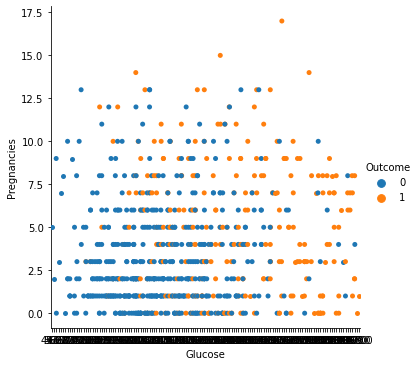

In [84]:
sns.catplot(x="Glucose", y="Pregnancies", data=diabetes_df,hue="Outcome")

Gráfica de glucosa contra presión sanguínea.

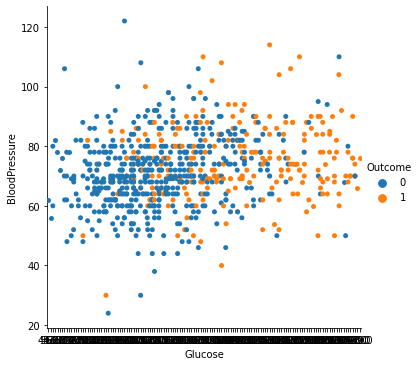

In [85]:
sns.catplot(x="Glucose", y="BloodPressure", data=diabetes_df,hue="Outcome")

Gráfica de glucosa contra nivel de insulina.

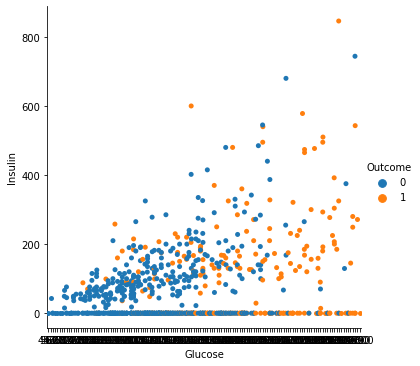

In [86]:
sns.catplot(x="Glucose", y="Insulin", data=diabetes_df,hue="Outcome")

Gráfica de glucosa conta índice de masa corporal.

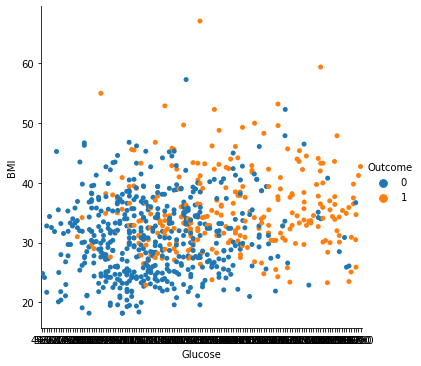

In [87]:
sns.catplot(x="Glucose", y="BMI", data=diabetes_df,hue="Outcome")

Gráfica de glucosa contra edad.

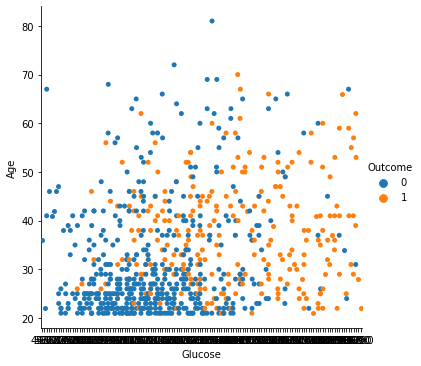

In [88]:
sns.catplot(x="Glucose", y="Age", data=diabetes_df,hue="Outcome")

Gráfica de glucosa contra grosor de la piel.

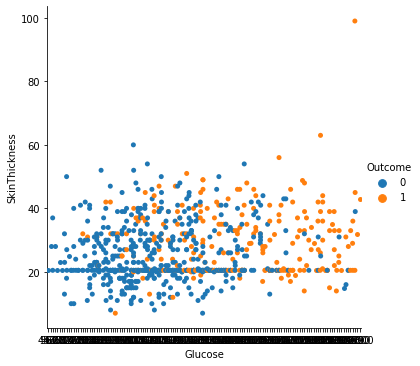

In [89]:
sns.catplot(x="Glucose", y="SkinThickness", data=diabetes_df,hue="Outcome")

Gráfica de edad contra presión sanguínea

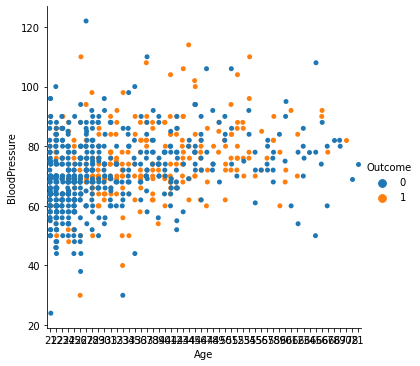

In [90]:
sns.catplot(x="Age", y="BloodPressure", data=diabetes_df,hue="Outcome")

Gráfica de índice de masa corporal contra presión sanguínea.

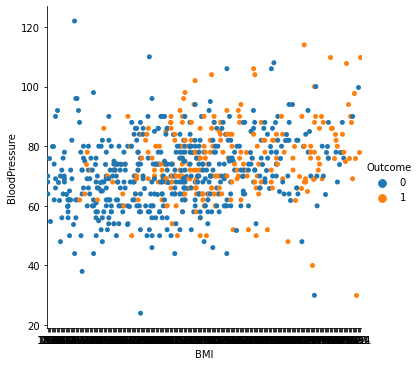

In [91]:
sns.catplot(x="BMI", y="BloodPressure", data=diabetes_df,hue="Outcome")

Creamos una función para obtener el porcentaje de diabetes de acuerdo a su composición corporal.

In [92]:
def porcentaje_diabetes_masa_corporal(composicion):
  n1=0
  n2=0
  n3=0
  for i in composicion:
    if i == "Normal":
      n1+=1
    elif i == "Elevado":
      n2+=1
    else:
      n3+=1
  return [n1,n2,n3]

Creamos una nueva variable a la cual le pasaremos nuestra función anterior y como parametro nuestra columna de "Composición Corporal" de nuestro Data Frame para obtener el número de pacientes que tienen un peso Normal, Elevado y nuestro último numero almacena el resto de pacientes que no estan en estas dos categorías.

In [93]:
personas_diabetes_masa = porcentaje_diabetes_masa_corporal(diabetes_confirmado_df["ComposicionCorporal"])
personas_diabetes_masa

[7, 40, 221]

Porcentaje de pacientes con peso normal.

In [94]:
personas_diabetes_masa[0]/diabetes_confirmado_df["ComposicionCorporal"].count()*100

2.6119402985074625

Porcentaje de pacientes con peso elevado.

In [95]:
personas_diabetes_masa[1]/diabetes_confirmado_df["ComposicionCorporal"].count()*100

14.925373134328357

Porcentaje de pacientes que no tienen peso normal o elevado.

In [96]:
personas_diabetes_masa[2]/diabetes_confirmado_df["ComposicionCorporal"].count()*100

82.46268656716418

En base al proceso anterior, creamos un nuevo data frame que almacena como tabla los porcentajes anteriores

In [97]:
porcentaje_peso = pd.DataFrame()
porcentaje_peso["Numero_de_personas"] = None
porcentaje_peso["%_del_total_de_personas"] = None

porcentaje_peso.loc['Normal'] = [personas_diabetes_masa[0],personas_diabetes_masa[0]/diabetes_confirmado_df["ComposicionCorporal"].count()*100]
porcentaje_peso.loc['Elevado'] = [personas_diabetes_masa[1],personas_diabetes_masa[1]/diabetes_confirmado_df["ComposicionCorporal"].count()*100]
porcentaje_peso.loc['Obesidad'] = [personas_diabetes_masa[2],personas_diabetes_masa[2]/diabetes_confirmado_df["ComposicionCorporal"].count()*100]

In [98]:
porcentaje_peso

Numero_de_personas  %_del_total_de_personas
Normal                   7.0                 2.611940
Elevado                 40.0                14.925373
Obesidad               221.0                82.462687

Ahora realizamos una nueva funcion que nos ayude a contar personas con peso normal y con pre diabetes.

In [99]:
def porcentaje_tipo_diabetes(tipodiabetes):
  n1=0
  n2=0
  n3=0
  for i in tipodiabetes:
    if i == "Normal":
      n1+=1
    elif i == "Pre Diabetes":
      n2+=1
    else:
      n3+=1
  return [n1,n2,n3]

Pasamos nuestra funcion a una nueva variable y le damos por parametro nuestra columna de TipoDiabetes.

In [101]:
personas_diabetes = porcentaje_tipo_diabetes(diabetes_confirmado_df["TipoDiabetes"])
personas_diabetes

[14, 71, 183]

Finalmente, creamos último data frame con estos porcentajes.

In [102]:
porcentaje_tipo = pd.DataFrame()
porcentaje_tipo["Numero_de_personas"] = None
porcentaje_tipo["%_del_total_de_personas"] = None

porcentaje_tipo.loc["Tipo_Normal"] = [personas_diabetes[0],personas_diabetes[0]/diabetes_confirmado_df["TipoDiabetes"].count()*100]
porcentaje_tipo.loc["Tipo_Pre-Diabetes"] = [personas_diabetes[1],personas_diabetes[1]/diabetes_confirmado_df["TipoDiabetes"].count()*100]
porcentaje_tipo.loc["Tipo_Diabetes"] = [personas_diabetes[2],personas_diabetes[2]/diabetes_confirmado_df["TipoDiabetes"].count()*100]

In [103]:
porcentaje_tipo

Numero_de_personas  %_del_total_de_personas
Tipo_Normal                      14.0                 5.223881
Tipo_Pre-Diabetes                71.0                26.492537
Tipo_Diabetes                   183.0                68.283582

* ## CONCLUSIONES


Por medio del análisis de nuestros datos, logramos responder las preguntas que nos planteamos como objetivo principal en este proyecto, además de que generamos nuevas preguntas a partir de observar el comportamiento de nuestros datos.

Este proyecto nos ayudo a realizar y entender los temas vistos en clase, ya que logramos obtener un dataset acorde a nuestro proyecto, revisar nuestros datos y desarrollar una estrategia optima para la limpieza de nuestros datos, así como de crear nuevas columnas que nos ayudaran a inferir otros datos y/o  nos facilitara la obtención e interpretación de los mismos.
